# Final Project
## Daoyu Li 93286958 daoyul1

## Task 1: Load the Data

In [1]:
import pandas as pd
import numpy as np

#Using Pandas to load the data
fm_train = pd.read_csv('fashion-mnist_train.csv')
fm_test = pd.read_csv('fashion-mnist_test.csv')

#generate X_train, y_train, X_test, y_test in the Numpy array format
X_train = np.array(fm_train.iloc[:,1:785])
y_train = np.array(fm_train.iloc[:,0])

X_test = np.array(fm_test.iloc[:,1:785])
y_test = np.array(fm_test.iloc[:,0])

In [3]:
X_train.shape

(60000, 784)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 784)

In [6]:
y_test.shape

(10000,)

## Task 2 : Logistic Regression

In [24]:
import numpy as np


class myLogisticRegression():
    """ 
    Adopt from lecture notes
    Multiclass Logistic Regression classifier
    
    learning_rate : how rapidly we update the parameters
    """
    def __init__(self, learning_rate=.1):
        
        self.learning_rate = learning_rate
        

    def fit(self, data, y, n_iterations = 1000):
        
        '''
        Fit the model according to the given training data and iteration times
        '''
        self.K = max(y)+1 # specify number of classes in y
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix
        eta = self.learning_rate
        
        W  = np.zeros((np.shape(X)[1],max(y)+1)) # initialize beta

        for k in range(n_iterations):
            dW = self.loss_gradient(W,X,y) #compute gradient
            W = W - eta * dW # the formula of GD
            #to see the change during the iterations
            if k % 500 == 0: # print loss every 500 steps
                print("loss after", k+1, "iterations is: ", self.loss(W,X,y))
        
        self.coeff = W
        
    def predict(self, data):
        '''
        Predict class labels for samples in data.
        '''
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix
        W = self.coeff # the estimated W
        y_pred = np.argmax(self.sigma(X,W), axis =1) # the category with largest probability
        return y_pred
    
    def score(self, data, y_true):
        '''
        Return the mean accuracy on the given test data and labels.
        '''
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix
        y_pred = self.predict(data)
        acc = np.mean(y_pred == y_true) # number of correct predictions/N
        return acc
    
    def sigma(self,X,W): #return the softmax probability
        s = np.exp(np.matmul(X,W))
        total = np.sum(s, axis=1).reshape(-1,1)
        return s/total
    
    def loss(self,W,X,y):
        f_value = self.sigma(X,W)
        K = self.K 
        loss_vector = np.zeros(X.shape[0])
        for k in range(K):
            loss_vector += np.log(f_value+1e-10)[:,k] * (y == k) # avoid nan issues
        return -np.mean(loss_vector)
                          
    def loss_gradient(self,W,X,y):
        f_value = self.sigma(X,W)
        K = self.K 
        dLdW = np.zeros((X.shape[1],K))
        for k in range(K):
            dLdWk =(f_value[:,k] - (y==k)).reshape(-1,1)*X # Numpy broadcasting
            dLdW[:,k] = np.mean(dLdWk, axis=0)   # RHS is 1D Numpy array -- so you can safely put it in the k-th column of 2D array dLdW
        return dLdW

In [9]:
lg = myLogisticRegression(learning_rate=1e-4)
lg.fit(X_train,y_train,n_iterations = 10000)

loss after 1 iterations is:  6.532929587423129
loss after 501 iterations is:  3.498053453456403
loss after 1001 iterations is:  3.29248062968853
loss after 1501 iterations is:  4.169917399521985
loss after 2001 iterations is:  4.733251684236494
loss after 2501 iterations is:  3.615774052490516
loss after 3001 iterations is:  3.8530574268415814
loss after 3501 iterations is:  4.058663889943982
loss after 4001 iterations is:  3.0725240472422652
loss after 4501 iterations is:  3.1658720485648715
loss after 5001 iterations is:  2.6839772197446132
loss after 5501 iterations is:  3.0964891449802554
loss after 6001 iterations is:  2.6911737276206957
loss after 6501 iterations is:  3.781949567552693
loss after 7001 iterations is:  3.78470862725702
loss after 7501 iterations is:  2.7409983962458466
loss after 8001 iterations is:  3.7175192117722786
loss after 8501 iterations is:  2.82535436617082
loss after 9001 iterations is:  2.7664057716422943
loss after 9501 iterations is:  3.98441571405102

In [10]:
lg.score(X_test,y_test)

0.7625

## Task 3: PCA

In [7]:
import numpy as np

class myPCA():
    '''
    Adopt from lecture notes.
    PCA is a typical unsupervised linear dimension reduction method
    '''
    
    def __init__(self, n_components = 2):
        '''
        Initialize n-components with defualt value 2
        '''
        self.n_c = n_components
    
    
    def fit(self,X):
        '''
        fit the model with X
        '''
        cov_mat = np.cov(X.T) # covariance matrix, the input matrix to this function does not need to be centered
        eig_val, eig_vec = np.linalg.eigh(cov_mat) #eigen-values and orthogonal eigen-vectors --ascending order
        eig_val = np.flip(eig_val) # reverse the order --descending
        eig_vec = np.flip(eig_vec,axis=1) # reverse the order
        self.eig_values = eig_val[:self.n_c] # select the top eigen-vals
        self.principle_components = eig_vec[:,:self.n_c] # select the top eigen-vecs
        self.variance_ratio = self.eig_values/eig_val.sum() # variance explained by each PC
    
    def transform(self,X):
        '''
        Apply dimensionality reduction to X.
        '''
        return np.matmul(X-X.mean(axis = 0),self.principle_components) #project the data (centered) on PCs

In [8]:
pca = myPCA(n_components = 5)
pca.fit(X_test)
X_pca = pca.transform(X_test)

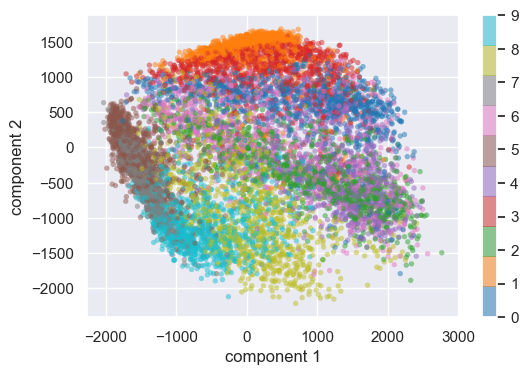

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
figure = plt.figure(dpi=100)
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=y_test, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## Task 4: Scikit Learn

In [3]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE

Supervised method

The k-nearest neighbors algorithm (k-NN) is a non-parametric classification method.

It is used for classification and regression. In both cases, the input consists of the k closest training examples in data set. The output depends on whether k-NN is used for classification or regression.

Suppose we have pairs $(X_1,Y_1), (X_2,Y_2), \dots, (X_n, Y_n) $ taking values in $\mathbb{R}^d \times \{1,2\}$, where {{mvar|Y}} is the class label of {{mvar|X}}, so that $X|Y=r \sim P_r$ for $r=1,2$ (and probability distributions $P_r$). Given some norm $\|\cdot\|$ on $\mathbb{R}^d$ and a point $x \in \mathbb{R}^d$, let $(X_{(1)},Y_{(1)}), \dots, (X_{(n)}, Y_{(n)}) $ be a reordering of the training data such that $ \|X_{(1)}-x\| \leq \dots \leq \|X_{(n)}-x\| $.

The knn first identifies the neibors which are cloest to $\mathbf{x}$ in the training dataset. By the formula $P\big(y= j| \mathbf{x} \big)$ we will know the probability of $\mathbf{x}$ belongs to each class. Computing the fraction of points in $\mathcal{N}$ whose label(s) actually equal $j$:

$$
P\big(y= j| \mathbf{x} \big)\approx  \frac{1}{k} \sum_{i\in \mathcal{N}_{x}} 1\{ y^{(i)} = j\}.
$$

We finally determine its class by picking up the class with largest probability.

In [3]:
knn_clf = KNeighborsClassifier(n_neighbors = 20)
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test,y_test)

0.8474

Unsupervised method

t-distributed stochastic neighbor embedding (t-SNE) is a statistical method for visualizing high-dimensional data by giving each datapoint a location in a two or three-dimensional map. It is based on Stochastic Neighbor Embedding.

t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

Formula:
Given a set of <math>N</math> high-dimensional objects $\mathbf{x}_1, \dots, \mathbf{x}_N$, t-SNE first computes probabilities $p_{ij}$ that are proportional to the similarity of objects $\mathbf{x}_i$ and $\mathbf{x}_j$, as follows. 

For $i \neq j$, define 
: $p_{j\mid i} = \frac{\exp(-\lVert\mathbf{x}_i - \mathbf{x}_j\rVert^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-\lVert\mathbf{x}_i - \mathbf{x}_k\rVert^2 / 2\sigma_i^2)}$
and set $p_{i\mid i} = 0$. 
Note that $\sum_j p_{j\mid i} = 1$ for all $i$. 

Construct the transition probability matrices of random walk in high-dimensional (denoted by $P$, which is $n\times n$ matrix) and low-dimensional space (denoted by $Q$), with Gaussian and t-distribution kernels respectively. Note that $Q$ contains the variable $y_{1},...,y_{n}\in \mathbb{R}^{k}$, i.e. reduced coordinates. tSNE aims to find the best $y_{1},...,y_{n}\in\mathbb{R}^{k}$ that minimizes the "distance" (KL divergence) between $P$ and $Q$ -- using gradient descent.

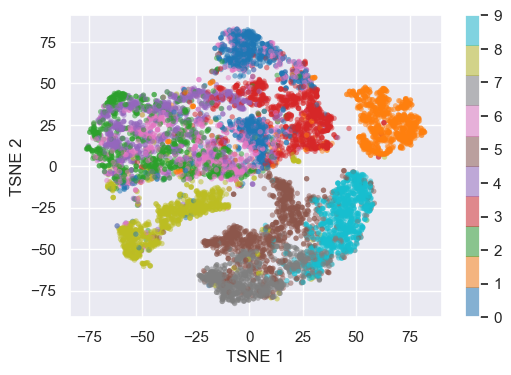

In [5]:
tsne = TSNE(n_jobs = -1)
X_tsne = tsne.fit_transform(X_test)

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
figure = plt.figure(dpi=100)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=y_test, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.colorbar();

## Task 5: cuMl

Comparing to Scikit-learn package, we can find out k-means clustering method from cuML takes less time (hundreds of ms)to get the result by using the GPU. In this dataset, cuML is more effective.

In [2]:
!nvidia-smi

Wed Mar 17 19:04:08 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.06    Driver Version: 450.51.06    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
'''
read files in kaggle notebook
'''

fm_train = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
fm_test = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')

X_train = np.array(fm_train.iloc[:,1:785])
y_train = np.array(fm_train.iloc[:,0])

X_test = np.array(fm_test.iloc[:,1:785])
y_test = np.array(fm_test.iloc[:,0])

In [4]:
'''
Since the kaggle only take float type data in model, I wrote these two helper function to transform int to float type.
TypeError: Expected input to be of type in [dtype('float32'), dtype('float64')] but got int64
'''
def floater_X(data):
    float_data = []
    for i in data:
        _inner = []
        for i2 in i:
            _inner.append(float(i2))
        float_data.append(_inner)
    return np.array(float_data)

def floater_y(data):
    float_data = []
    for i in data:
        float_data.append(float(i))
    return np.array(float_data)

In [5]:
#float data
X_train = floater_X(X_train)
y_train = floater_y(y_train)
X_test = floater_X(X_test)
y_test = floater_y(y_test)

In [6]:
%%time
from cuml import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
y_km = kmeans.fit_predict(X_test)

CPU times: user 2.94 s, sys: 1.36 s, total: 4.3 s
Wall time: 9.52 s


In [7]:
%%time
from cuml import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_test)

CPU times: user 785 ms, sys: 219 ms, total: 1 s
Wall time: 2.22 s


CPU times: user 86 ms, sys: 4.19 ms, total: 90.2 ms
Wall time: 127 ms


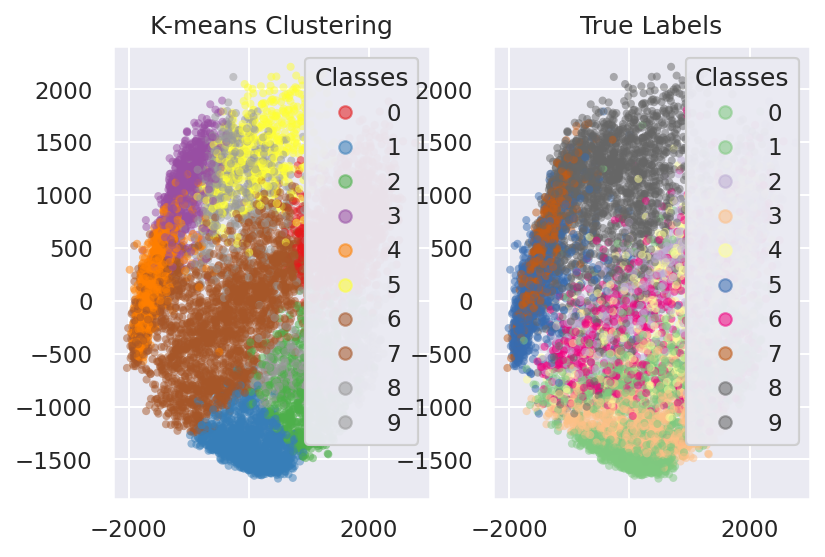

In [8]:
%%time
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
fig, (ax1, ax2) = plt.subplots(1, 2,dpi=150)

fig1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1],c=y_km, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Set1', 10))
fig2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1],c=y_test, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Accent', 10))
ax1.set_title('K-means Clustering')
legend1 = ax1.legend(*fig1.legend_elements(), loc="best", title="Classes")
ax1.add_artist(legend1)
ax2.set_title('True Labels')
legend2 = ax2.legend(*fig2.legend_elements(), loc="best", title="Classes")
ax2.add_artist(legend2)

In [9]:
#Compare with the same algorithm in scikit-learn

In [10]:
%%time
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
y_km = kmeans.fit_predict(X_test)

CPU times: user 15 s, sys: 41.8 ms, total: 15 s
Wall time: 10.3 s


In [11]:
%%time
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_test)

CPU times: user 4.11 s, sys: 1.34 s, total: 5.45 s
Wall time: 3.43 s


CPU times: user 68.8 ms, sys: 1.14 ms, total: 69.9 ms
Wall time: 66.1 ms


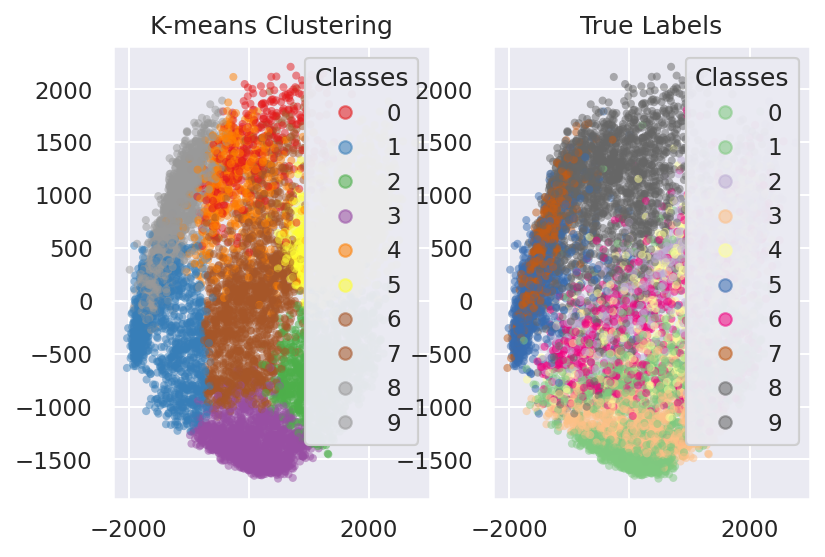

In [12]:
%%time
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
fig, (ax1, ax2) = plt.subplots(1, 2,dpi=150)

fig1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1],c=y_km, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Set1', 10))
fig2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1],c=y_test, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Accent', 10))
ax1.set_title('K-means Clustering')
legend1 = ax1.legend(*fig1.legend_elements(), loc="best", title="Classes")
ax1.add_artist(legend1)
ax2.set_title('True Labels')
legend2 = ax2.legend(*fig2.legend_elements(), loc="best", title="Classes")
ax2.add_artist(legend2)

## Task 5: tensorflow

In [18]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [19]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [20]:
# sequential model to define a graph of neural network
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),# input layer
  tf.keras.layers.Dense(128, activation='relu'), # hidden layer
  tf.keras.layers.Dense(64, activation='relu'), # hidden layer
  tf.keras.layers.Dense(10, activation='softmax') # output layer for classification
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(x_train, y_train, epochs=100, batch_size = 2048)
model.evaluate(x_test, y_test)

Epoch 1/100
30/30 [==============================] - 0s 5ms/step - loss: 1.6605 - accuracy: 0.5155
Epoch 2/100
30/30 [==============================] - 0s 5ms/step - loss: 0.3910 - accuracy: 0.8880
Epoch 3/100
30/30 [==============================] - 0s 5ms/step - loss: 0.2776 - accuracy: 0.9208
Epoch 4/100
30/30 [==============================] - 0s 5ms/step - loss: 0.2266 - accuracy: 0.9358
Epoch 5/100
30/30 [==============================] - 0s 5ms/step - loss: 0.1969 - accuracy: 0.9436
Epoch 6/100
30/30 [==============================] - 0s 5ms/step - loss: 0.1662 - accuracy: 0.9536
Epoch 7/100
30/30 [==============================] - 0s 5ms/step - loss: 0.1524 - accuracy: 0.9570
Epoch 8/100
30/30 [==============================] - 0s 5ms/step - loss: 0.1368 - accuracy: 0.9606
Epoch 9/100
30/30 [==============================] - 0s 5ms/step - loss: 0.1230 - accuracy: 0.9650
Epoch 10/100
30/30 [==============================] - 0s 5ms/step - loss: 0.1140 - accuracy: 0.9672
Epoch 11/

30/30 [==============================] - 0s 5ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 84/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 85/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 86/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 87/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 88/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 89/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 90/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 91/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 92/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 93/100


[0.09957998245954514, 0.9789000153541565]